# 05. Vehicle Dynamics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

In [2]:
def converter(v):
    return (v/3600)*1000

In [3]:
#Stopping sight distance Xssd
a = 2 #m/s^2
tp = 2.5 #seconds
v = 50 #km/hr
v = converter(v) #m/s
xssd = tp*v + (v**2 / 2*a)
print(f'Stopping sight distance: {xssd} m')

Stopping sight distance: 227.6234567901234 m


In [4]:
#Clearance distance Xcl
w = 10 #m
L = 3.2 #m 
ty = 5.5 #seconds
xcl = ty*v-w-L
print(f'Clearing sight distance: {xcl} m')

Clearing sight distance: 63.18888888888888 m


In [5]:
def traffic_safety(x0,xcl,xssd):
    clear = False
    stop = False
    if x0 < xcl:
        clear = True
        return clear
    elif x0 > xssd:
        stop = True
        return stop
    return False

**Louis can travel 100 m. Is he in a safe situation?**

In [6]:
xlouis = 100
can_louis_survive = traffic_safety(xlouis,xcl,xssd)
print(can_louis_survive)

False


**Too bad Louis is in a dilema zone because xlouis is in between that value.**

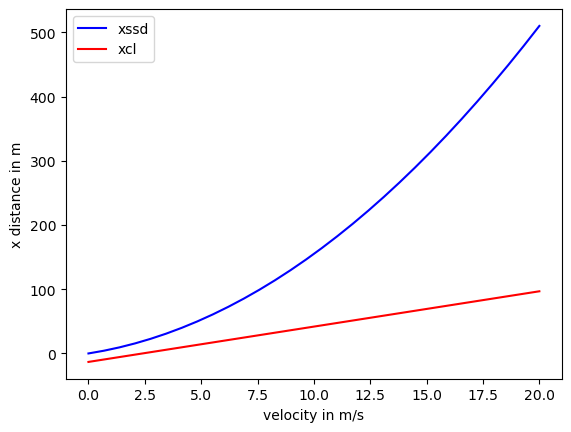

In [7]:
tp = 2.2
v = np.linspace(0,20,30)
xcl = lambda xcl: ty*v-w-L 
y_scl = xcl(v)
xssd = lambda xcl: ty*v + (v**2 / 2*a)
y_ssd = xssd(v)

plt.plot(v,y_ssd,label='xssd',color='blue')
plt.plot(v,y_scl,label='xcl',color='red')
plt.legend()
plt.xlabel('velocity in m/s')
plt.ylabel('x distance in m')
plt.show()

## Free-body Diagram

- Propulsion Force: Vehicle delivers the force that is required to overcome the resistance forces 
- Resistance Forces: The forces that tries to resist the vehicle from moving 

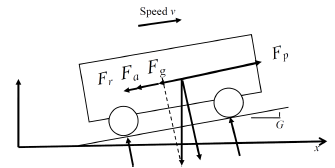

## Aerodynamic Drag 

- Drag forces oppose the motion of the vehicle in some sort of continuum model (i.e air,fluids,gas, etc...)

$$ F_a = \frac{1}{2} \rho CAv^2 $$

- C: Coefficient of Drag 
- A: Area of the vehicle 
- v: Velocity of the vehicle
- p: Density of the continuum

|Vehicle| Drag Coefficient C | 
| -- | -- |
| Cars| 0.25 ~ 0.35 |
| Light Trucks | 0.35 ~ 0.45 | 
| Heavy Trucks | 0.7 ~ 0.9 |

# Rolling Resistance
Definition: Force that is trying to resist the motion rolling in a circular motion in a surface. They are mainly due to the resistance of the tire deformation, the wheel's air circulation and tire penetration, and tire surface deformation

$$ F_r = f_r mg \\ $$
$$ f_r = C_{r0} + C_{r1}v $$

- fr is the coefficient of rolling
- Cr0 and Cr1 are dependant on the wheel type and the surface 

**We have a separate formula for the coefficient of rolling for trucks**

$$ f_r = 0.01(1+\frac{v}{44.73}) $$

# Grade Resistance 
Definition: Grade resistance is the **gravitational force** acting on the vehicle. The grade G is basically the slope so rise over run which is expressed as a decimal. 

$$ F_G = mgG \\ $$

The formula above is applied when the grade is small

# Propulsion Force 
Definition: Force given by the engine to the tires.

$$ \sum{F} = F_p - (F_a+F_r+F_g) \\ $$

Also remember Newton's second law: </br>

$$ \sum{F} = ma \\ $$
where m is mass measured in kg and a is the acceleration in m/s^2.

If the speed is constant, then the acceleration is 0. So:

$$ F_p = (F_a + F_r + F_g) $$

# Engine Power 
Definition: Applied force multipled by the speed of the vehicle 
$$ P = Fv \\ $$

- Watts is the unit to measure power.
- v is the constant speed. 
- 1 W = 1 Nm/s = 1 kgm^2/s^3 
- 1 horsepower = 745 Watts

**Problem 1:** 
Louis' self-driving car has a frontal area of 20 m^2. The coefficient of drag is 0.30 and assume gravitational accerlation g = 9.81 m^2. At sea level, the air density is 1.3 kg/m^3 and Louis' car can travel at a speed of 50 m/s and a 5% grade. The loaded mass of the car is 30,000 kg (including his car). What is Louis' self-driving car's maximum power in kilowatts? 

In [11]:
# Solution to the problem
# We need to calculate the aerodynamic drag force first 
A = 20 # frontal area in m^2 
C = 0.3 # coefficient of drag
g = 9.81 # gravitational acceleration in m/s^2
rho = 1.3 # air density in kg/m^3
v = 50 # velocity m/s
G = 5 # grade 
G/= 100 # convert to decimals
m = 30000 # mass of the car in kg 

Fa = 0.5*C*A*rho*v**2 
print(f'Aerodynamic Drag Fa: {Fa} Newtons')

Aerodynamic Drag Fa: 9750.0 Newtons


In [12]:
# Then we need to compute the rolling resistance force
fr = 0.01*(1 + (v/44.73))
Fr = fr*m*g 
print(f'Rolling Resistance: {Fr} Newtons')

Rolling Resistance: 6232.738430583501 Newtons


In [13]:
# Now we need to determine the gravitational force 
Fg= m*g*G
print(f'Gravitational Force: {Fg} Netwons')

Gravitational Force: 14715.0 Netwons


In [15]:
# Because the velocity value given does not change, this means that the acceleration is 0. 
Fp = sum([Fg,Fr,Fa])
print(f'Propulsion Force: {Fp} Newtons')

Propulsion Force: 30697.7384305835 Newtons


In [17]:
# Power is therefore P = Fv 
Power = Fp*v
Power /= 1000 
print(f'Power in kilowatts: {Power} kilowatts')

Power in kilowatts: 1534.886921529175 kilowatts
